In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(b3d.get_root_path())

In [3]:
import jax.numpy as jnp
import rerun as rr

In [4]:
from tests.dense_model_unit_tests.triangle_depth_posterior.task import (
    TrianglePosteriorGridApproximationTask,
)
from tests.dense_model_unit_tests.triangle_depth_posterior.solver.importance import (
    DiffrendImportanceSolver,
)

/home/georgematheos/b3d/tests/dense_model_unit_tests/triangle_depth_posterior/solver/importance.py:46: SyntaxWarning: invalid escape sequence '\i'
  """


In [5]:
task_specs = [
    (background_color, triangle_color)
    for background_color in [jnp.array([1.0, 1.0, 1.0]), jnp.array([0.0, 0.0, 0.0])]
    for triangle_color in [jnp.array([1.0, 0.0, 0.0]), jnp.array([0.0, 1.0, 0.0])]
]

In [6]:
task = TrianglePosteriorGridApproximationTask.default_scene_using_colors(*task_specs[0])

In [7]:
rr.init("triangle_posterior_test-2")
rr.connect("127.0.0.1:8812")
task.visualize_task()

In [9]:
solver = DiffrendImportanceSolver()
task_spec = task.get_task_specification()
solution = solver.solve(task_spec)

/home/georgematheos/b3d/tests/dense_model_unit_tests/triangle_depth_posterior/solver/importance.py:46: SyntaxWarning: invalid escape sequence '\i'
  """


In [10]:
metrics = task.score(solution)
metrics

{'mass_assigned_outside_expected_region': Array(2.546743e-05, dtype=float32),
 'divergence_from_uniform_in_expected_region': Array(inf, dtype=float32),
 'log_posterior_approximation': Array([-1446.1875   , -1446.1875   , -1446.1875   , -1446.1875   ,
        -1446.1875   , -1446.1875   , -1446.1875   , -1446.1875   ,
        -1446.1875   , -1446.1875   , -1446.1875   , -1446.1875   ,
        -1446.1875   , -1446.1875   , -1446.1875   , -1940.2969   ,
        -1940.2969   , -1749.9531   , -1331.6094   , -1221.7266   ,
         -941.125    ,  -824.7031   ,  -599.8828   ,  -561.0781   ,
         -472.40625  ,  -407.0547   ,  -395.76562  ,  -338.33594  ,
         -312.98438  ,  -295.01562  ,  -272.33594  ,  -262.66406  ,
         -242.03906  ,  -215.54688  ,  -206.07812  ,  -189.51562  ,
         -184.       ,  -170.34375  ,  -155.64062  ,  -144.52344  ,
         -137.58594  ,  -125.00781  ,  -118.9375   ,  -114.125    ,
         -109.1875   ,  -102.22656  ,   -93.640625 ,   -89.86719  ,
 

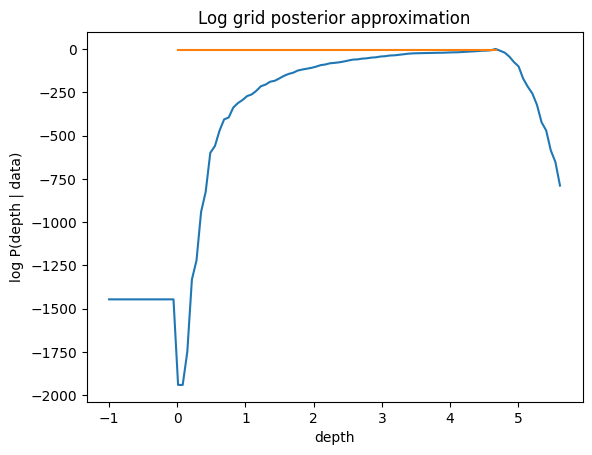

In [11]:
task.visualize_solution(solution, metrics)

In [ ]:
solver.visualize_solver_state()

## Visualize what happens as we change SIGMA in the differentiable renderer

As we decrease this, the sharpness of the rendered images increase, and the posterior becomes more uniform.

***p1 = 0.0031622776601683794***
***p1 = 0.001***
***p1 = 0.0001***
***p1 = 1e-05***
***p1 = 1e-06***
***p1 = 3.162277660168379e-07***


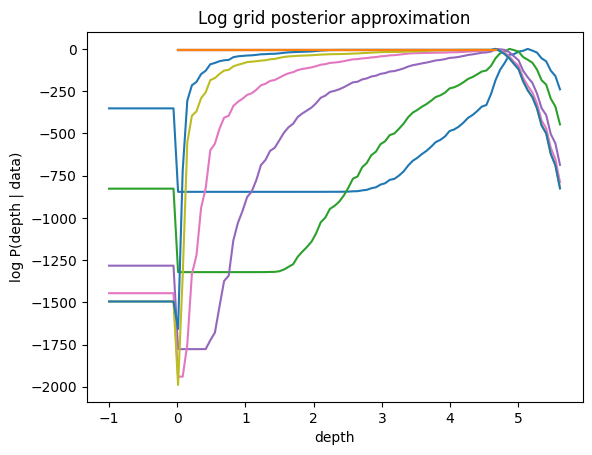

In [12]:
p1s = [10 ** (-i) for i in [2.5, 3, 4, 5, 6, 6.5]]
for p1 in p1s:
    hyperparams = (
        b3d.chisight.dense.differentiable_renderer.DifferentiableRendererHyperparams(
            3, p1, 1e-2, -1
        )
    )
    print(f"***p1 = {p1}***")
    rr.init(f"triangle_posterior_test--sigma=10^{p1}")
    rr.connect("127.0.0.1:8812")
    task.visualize_task()

    solver = DiffrendImportanceSolver(hyperparams)
    solution = solver.solve(task_spec)
    metrics = task.score(solution)
    task.visualize_solution(solution, metrics)

***p1 = 1e-06***
***p1 = 1e-07***
***p1 = 1e-08***
***p1 = 1e-09***


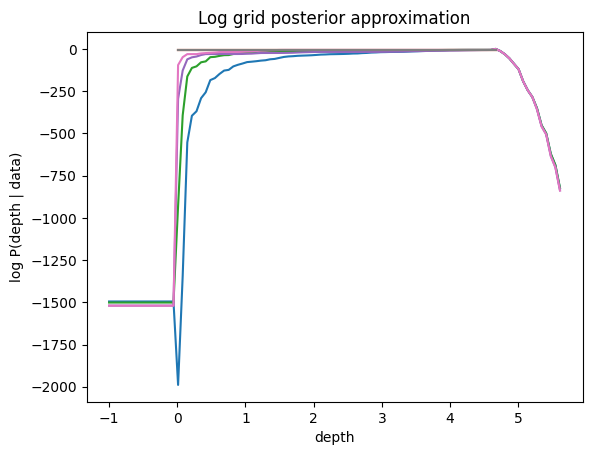

In [13]:
p1s = [10 ** (-i) for i in [6, 7, 8, 9]]
for p1 in p1s:
    hyperparams = (
        b3d.chisight.dense.differentiable_renderer.DifferentiableRendererHyperparams(
            3, p1, 1e-2, -1
        )
    )
    print(f"***p1 = {p1}***")
    rr.init(f"triangle_posterior_test--sigma=10^{p1}")
    rr.connect("127.0.0.1:8812")
    task.visualize_task()

    solver = DiffrendImportanceSolver(hyperparams)
    solution = solver.solve(task_spec)
    metrics = task.score(solution)
    task.visualize_solution(solution, metrics)